In [1]:
!pip install nltk
!pip install PySastrawi
!pip install swifter
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=e6794e144999091d26b95bd364d78a61ed24e5ce3916b58ec969dc50780eff3d
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/DATASET.csv", sep=";")
print(data.head())

                              coment      label
0         Gustav yakin ini idola loh  NEGATIIVE
1                  ajarin pedee dong   NEGATIVE
2     woii boong ini srius manis bgt   NEGATIVE
3  ternyata hitam, belum tentu manis   NEGATIVE
4                     Maghrib banget   NEGATIVE


Lowercasing

In [3]:
data['coment'] = data['coment'].astype(str).str.lower()

print('Case Folding Result : \n')
print(data['coment'].head())

file_path = "case_folding_result.xlsx"
data.to_excel(file_path, index=False)

Case Folding Result : 

0           gustav yakin ini idola loh
1                    ajarin pedee dong
2       woii boong ini srius manis bgt
3    ternyata hitam, belum tentu manis
4                       maghrib banget
Name: coment, dtype: object


Case Folding dan Tokenizing

In [4]:
import string
import re
import nltk
nltk.download("punkt_tab")

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def remove_emoji(text):
  emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002500-\U00002BEF"  # chinese char
                            u"\U00002702-\U000027B0"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u"\U00010000-\U0010ffff"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                            u"\u200d"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\ufe0f"  # dingbats
                            u"\u3030"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

def remove_number(text):
  return re.sub(r"\d+", "", text)

def remove_punctuation(text):
  return text.translate(str.maketrans("","",string.punctuation))

def remove_whitespace(text):
  return text.strip()

def remove_multiple_whitespace(text):
  return re.sub('\s+', ' ', text)

def remove_single_char(text):
  return re.sub(r"\b[a-zA-Z]\b", "", text)

def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['coment'] = data['coment'].apply(remove_emoji)
data['coment'] = data['coment'].apply(remove_number)
data['coment'] = data['coment'].apply(remove_punctuation)
data['coment'] = data['coment'].apply(remove_whitespace)
data['coment'] = data['coment'].apply(remove_multiple_whitespace)
data['coment'] = data['coment'].apply(remove_single_char)
data['tokens'] = data['coment'].apply(word_tokenize_wrapper)

print(data['tokens'].head(10))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


0                     [gustav, yakin, ini, idola, loh]
1                                [ajarin, pedee, dong]
2                [woii, boong, ini, srius, manis, bgt]
3               [ternyata, hitam, belum, tentu, manis]
4                                    [maghrib, banget]
5    [kok, beda, yg, lain, pada, terang, bnget, may...
6                  [mayang, auranya, rohingia, banget]
7    [mayang, kalah, ama, lolyy, sih, yallah, ampun...
8       [ko, bisa, bgtu, yyg, lain, semua, ny, bening]
9    [cmn, mayang, sama, deddy, yang, vibes, nya, m...
Name: tokens, dtype: object


Normalisasi

In [5]:
normalized_word = pd.read_csv("/content/kamus.csv", sep=";")
normalized_word['word'] = normalized_word['BEFORE'].str.lower().str.strip()
normalized_word['normalized_form'] = normalized_word['AFTER'].str.lower().str.strip()

normalized_word_dict = dict(zip(normalized_word['word'], normalized_word['normalized_form']))

#for index, row in normalized_word.iterrows():
#    if row.iloc[0] not in normalized_word_dict:  # Menggunakan .iloc untuk akses kolom
#        normalized_word_dict[row.iloc[0]] = row.iloc[1]  # Menggunakan .iloc

def normalized_term(document):
  return[normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

data['normalized'] = data['tokens'].apply(normalized_term)

print(data['normalized'].head(10))

data.to_excel("output.xlsx", index=False)

0                     [gustav, yakin, ini, idola, loh]
1                                [ajarin, pedee, dong]
2           [woii, bohong, ini, serius, manis, banget]
3               [ternyata, hitam, belum, tentu, manis]
4                                    [maghrib, benget]
5    [kok, beda, yang, lain, pada, terang, banget, ...
6                     [mayang, aura, rohingya, benget]
7    [mayang, kalah, sama, loly, sih, yallah, ampun...
8    [kok, bisa, begitu, yyg, lain, semua, ny, bening]
9    [cuman, mayang, sama, deddy, yang, vibes, nya,...
Name: normalized, dtype: object


Stopwords Removal

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = set(stopwords.words('indonesian'))

list_stopwords = set(list_stopwords)

def stopwords_removal(words):
  return [word for word in words if word not in list_stopwords]

data['stopwords'] = data['normalized'].apply(stopwords_removal)

print(data['stopwords'].head(10))

data.to_excel("output_STOPWORD.xlsx", index=False)

0                                 [gustav, idola, loh]
1                                      [ajarin, pedee]
2                [woii, bohong, serius, manis, banget]
3                                       [hitam, manis]
4                                    [maghrib, benget]
5          [beda, terang, banget, mayang, mode, malam]
6                     [mayang, aura, rohingya, benget]
7    [mayang, kalah, loly, sih, yallah, ampun, ngak...
8                                    [yyg, ny, bening]
9    [cuman, mayang, deddy, vibes, nya, maghrib, ba...
Name: stopwords, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Stemming

In [7]:
#import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    # Check if the term is a string before stemming
    if isinstance(term, str):
        return stemmer.stem(term)
    else:
        # Handle non-string terms (e.g., NaN)
        return str(term)  # or any desired replacement

term_dict = {}

for document in data['normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['tokens_stemmed'] = data['normalized'].swifter.apply(get_stemmed_term)
print(data['tokens_stemmed'].head(10))

data.to_excel("output_stemming.xlsx", index=False)

1807
------------------------
gustav : gustav
yakin : yakin
ini : ini
idola : idola
loh : loh
ajarin : ajarin
pedee : pedee
dong : dong
woii : woii
bohong : bohong
serius : serius
manis : manis
banget : banget
ternyata : nyata
hitam : hitam
belum : belum
tentu : tentu
maghrib : maghrib
benget : benget
kok : kok
beda : beda
yang : yang
lain : lain
pada : pada
terang : terang
mayang : mayang
mode : mode
malam : malam
sendiri : sendiri
aura : aura
rohingya : rohingya
kalah : kalah
sama : sama
loly : loly
sih : sih
yallah : yallah
ampun : ampun
ngakak : ngakak
bisa : bisa
begitu : begitu
yyg : yyg
semua : semua
ny : ny
bening : bening
cuman : cuman
deddy : deddy
vibes : vibes
nya : nya
plot : plot
twist : twist
orang : orang
wajahnya : wajah
memancarkan : pancar
seperti : seperti
apa : apa
hatinya : hati
warna : warna
kulitnya : kulit
menyatu : satu
dengan : dengan
rambutnya : rambut
kbtulan : kbtulan
liat : liat
pas : pas
lagi : lagi
tau : tau
bayi : bayi
bajang : bajang
nggak : nggak
men

Pandas Apply:   0%|          | 0/1208 [00:00<?, ?it/s]

0                     [gustav, yakin, ini, idola, loh]
1                                [ajarin, pedee, dong]
2           [woii, bohong, ini, serius, manis, banget]
3                  [nyata, hitam, belum, tentu, manis]
4                                    [maghrib, benget]
5    [kok, beda, yang, lain, pada, terang, banget, ...
6                     [mayang, aura, rohingya, benget]
7    [mayang, kalah, sama, loly, sih, yallah, ampun...
8    [kok, bisa, begitu, yyg, lain, semua, ny, bening]
9    [cuman, mayang, sama, deddy, yang, vibes, nya,...
Name: tokens_stemmed, dtype: object


Pembobotan

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

def identity(x):
    return x

vectorizer = TfidfVectorizer(analyzer=identity, min_df=2, max_df=0.95)
tfidf_matrix = vectorizer.fit_transform(data['tokens_stemmed'])

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=vectorizer.get_feature_names_out()
)

print("TF-IDF Matrix:")
print(tfidf_df.head(5))

excel_filename = 'hasil_tfidf.xlsx'
tfidf_df.to_excel(excel_filename, index=False)
print(f"File {excel_filename} telah disimpan.")

TF-IDF Matrix:
         aa  aaa  aaaa  aah  abu  ada  adik  aduh  agak  ...      woii  woiii  \
0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0   0.0  ...  0.000000    0.0   
1  0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0   0.0  ...  0.000000    0.0   
2  0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0   0.0  ...  0.528999    0.0   
3  0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0   0.0  ...  0.000000    0.0   
4  0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0   0.0  ...  0.000000    0.0   

   wow  woy  woyy   ya  yaa  yaallah  yah  yang  
0  0.0  0.0   0.0  0.0  0.0      0.0  0.0   0.0  
1  0.0  0.0   0.0  0.0  0.0      0.0  0.0   0.0  
2  0.0  0.0   0.0  0.0  0.0      0.0  0.0   0.0  
3  0.0  0.0   0.0  0.0  0.0      0.0  0.0   0.0  
4  0.0  0.0   0.0  0.0  0.0      0.0  0.0   0.0  

[5 rows x 561 columns]
File hasil_tfidf.xlsx telah disimpan.


Klasifikasi

In [9]:
pip install seaborn

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# Mengubah label kategori Positif dan Negatif menjadi angka 0 & 1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['label'])

x = tfidf_matrix
y = y_encoded

# Membagi data menjadi Training dan Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

# Prediksi label untuk data Testing
y_pred = nb_classifier.predict(x_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")
print("\nClassification Report: ")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

# Buat dictionary untuk menyimpan hasil evaluasi
hasil_evaluasi = {
    'Akurasi': [f"{accuracy * 100:.2f}%"],
    'Classification Report': [classification_report(y_test, y_pred)],
    'Confusion Matrix': [str(confusion_matrix(y_test, y_pred))]
}

# Ubah jadi DataFrame
df_evaluasi = pd.DataFrame(hasil_evaluasi)

# Simpan ke file Excel
df_evaluasi.to_excel("evaluasi_model.xlsx", index=False, engine='openpyxl')
print("Hasil evaluasi berhasil disimpan sebagai 'evaluasi_model.xlsx'")

Akurasi: 88.43%

Classification Report: 
              precision    recall  f1-score   support

           1       0.86      0.97      0.91       145
           2       0.94      0.76      0.84        97

    accuracy                           0.88       242
   macro avg       0.90      0.86      0.88       242
weighted avg       0.89      0.88      0.88       242


Confusion Matrix: 
[[140   5]
 [ 23  74]]
Hasil evaluasi berhasil disimpan sebagai 'evaluasi_model.xlsx'


                             coment      label  \
0        gustav yakin ini idola loh  NEGATIIVE   
1                 ajarin pedee dong   NEGATIVE   
2    woii boong ini srius manis bgt   NEGATIVE   
3  ternyata hitam belum tentu manis   NEGATIVE   
4                    maghrib banget   NEGATIVE   

                                   tokens  \
0        [gustav, yakin, ini, idola, loh]   
1                   [ajarin, pedee, dong]   
2   [woii, boong, ini, srius, manis, bgt]   
3  [ternyata, hitam, belum, tentu, manis]   
4                       [maghrib, banget]   

                                   normalized  \
0            [gustav, yakin, ini, idola, loh]   
1                       [ajarin, pedee, dong]   
2  [woii, bohong, ini, serius, manis, banget]   
3      [ternyata, hitam, belum, tentu, manis]   
4                           [maghrib, benget]   

                               stopwords  \
0                   [gustav, idola, loh]   
1                        [ajarin, pedee]   
2

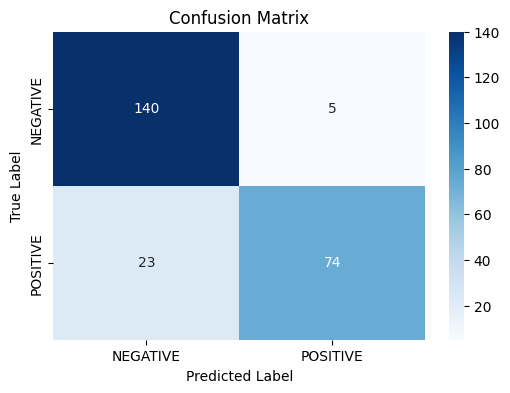

Hasil prediksi berhasil disimpan ke 'hasil_prediksi.xlsx'


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# Mengubah label kategori Positif dan Negatif menjadi angka 0 & 1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['label'])

x = tfidf_matrix
y = y_encoded

# Membagi data menjadi Training dan Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

# Prediksi label untuk data Testing
y_pred = nb_classifier.predict(x_test)


# Pastikan kolom 'label' ada dalam dataset
print(data.head())  # Untuk mengecek apakah dataset sudah terbaca dengan benar

y_encoded = label_encoder.fit_transform(data['label'])
# Menampilkan hasil prediksi komentar dengan label aslinya
for i in range(10):  # Menampilkan 10 hasil pertama
    print(f"coment: {data['coment'].iloc[i]}")
    print(f"label: {label_encoder.inverse_transform([y_pred[i]])[0]}")
    print("-" * 50)


# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")
print("\nClassification Report: ")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NEGATIVE', 'POSITIVE'],
            yticklabels=['NEGATIVE', 'POSITIVE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Buat DataFrame hasil prediksi
result_df = pd.DataFrame({
    'coment': data['coment'].iloc[:len(y_pred)],  # Pastikan jumlahnya sesuai
    'actual_label': label_encoder.inverse_transform(y_test[:len(y_pred)]),
    'predicted_label': label_encoder.inverse_transform(y_pred)
})

# Simpan ke file Excel
result_df.to_excel('hasil_prediksi.xlsx', index=False, engine='openpyxl')
print("Hasil prediksi berhasil disimpan ke 'hasil_prediksi.xlsx'")

In [12]:
import os
import pickle

# Tentukan path folder tempat penyimpanan
folder_path = "/content/drive/MyDrive/syahraf/Models"

# Membuat folder jika belum ada
os.makedirs(folder_path, exist_ok=True)

# Nama file dan path lengkapnya
model_filename = "nb_classifier.pkl"
model_path = os.path.join(folder_path, model_filename)

# Menyimpan model Naive Bayes
with open(model_path, "wb") as file:
    pickle.dump(nb_classifier, file)

# Menyimpan vectorizer TF-IDF
vectorizer_filename = "tfidf_vectorizer.pkl"
vectorizer_path = os.path.join(folder_path, vectorizer_filename)
with open(vectorizer_path, "wb") as file:
    pickle.dump(vectorizer, file)

# Menyimpan label encoder
label_encoder_filename = "label_encoder.pkl"
label_encoder_path = os.path.join(folder_path, label_encoder_filename)
with open(label_encoder_path, "wb") as file:
    pickle.dump(label_encoder, file)

In [13]:
import pickle
import pandas as pd
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#Path model yang telah disimpan
model_path = "/content/drive/MyDrive/syahraf/Models/nb_classifier.pkl"
vectorizer_path = "/content/drive/MyDrive/syahraf/Models/tfidf_vectorizer.pkl"
label_encoder_path = "/content/drive/MyDrive/syahraf/Models/label_encoder.pkl"
normalized_word_path = "/content/kamus.csv"

# Load Model
with open(model_path, "rb") as file:
    nb_classifier = pickle.load(file)
with open(vectorizer_path, "rb") as file:
    vectorizer = pickle.load(file)
with open(label_encoder_path, "rb") as file:
    label_encoder = pickle.load(file)

# Read kamus normalisasi
normalized_word = pd.read_csv(normalized_word_path, sep=";")
normalized_word_dict = dict(zip(normalized_word['BEFORE'].str.lower(), normalized_word['AFTER'].str.lower()))

# Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [14]:
import string
import re

def preprocess_text(text):
    # Case Folding
    text = text.lower()
    # Remove emoji, number, punctuation, whitespace
    text = re.sub(r"[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF\U00002500-\U00002BEF\U00002702-\U000027B0\U000024C2-\U0001F251\U0001f926-\U0001f937\U00010000-\U0010ffff\u2640-\u2642\u2600-\u2B55\u200d\u23cf\u23e9\u231a\ufe0f\u3030]+", "", text) # Remove Emoji
    text = re.sub(r"\d+", "", text) # Remove Number
    text = text.translate(str.maketrans("", "", string.punctuation)) # Remove punctuation
    text = text.strip() # Remove whitespace
    text = re.sub('\s+', ' ', text) # Remove multiple whitespace
    text = re.sub(r"\b[a-zA-Z]\b", "", text) # Remove single char

    # Tokenisasi
    tokens = word_tokenize(text)

    # Normalisasi
    normalized_tokens = [normalized_word_dict[term] if term in normalized_word_dict else term for term in tokens]

    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in normalized_tokens]

    return stemmed_tokens

In [15]:
# Kalimat yang akan diuji
new_sentence = "terawat gak si"

# Pra-pemrosesan kalimat
processed_sentence = preprocess_text(new_sentence)

# Transformasi menggunakan TF-IDF Vectorizer
sentence_vector = vectorizer.transform([processed_sentence])

# Prediksi kelas
predicted_class_index = nb_classifier.predict(sentence_vector)[0]

# Dapatkan label kelas asli
predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]

# Tampilkan hasil prediksi
print(f"Kalimat: {new_sentence}")
print(f"Prediksi Kelas: {predicted_class_label}")

Kalimat: terawat gak si
Prediksi Kelas: NEGATIVE


**VISUALISASI** **WORDCLOUD**

In [16]:
pip install wordcloud matplotlib

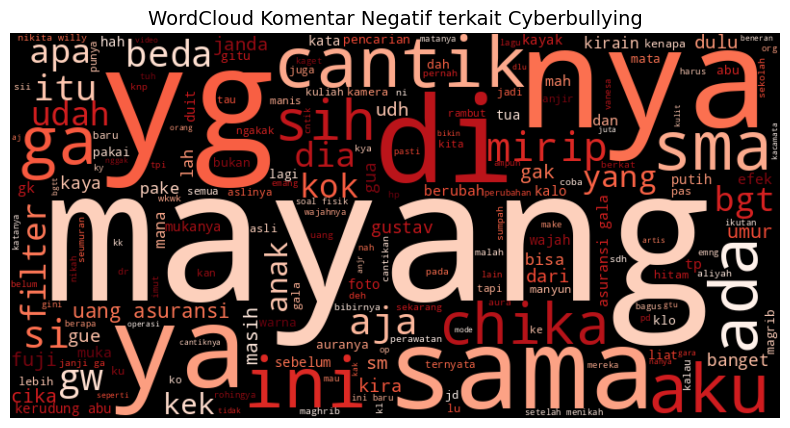

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter hanya komentar dengan label negatif
negatif_text = " ".join(data[data['label'] == 'NEGATIVE']['coment'])

# Buat WordCloud untuk komentar negatif
wordcloud_negatif = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negatif_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')  # Hilangkan sumbu
plt.title("WordCloud Komentar Negatif terkait Cyberbullying", fontsize=14)
plt.show()


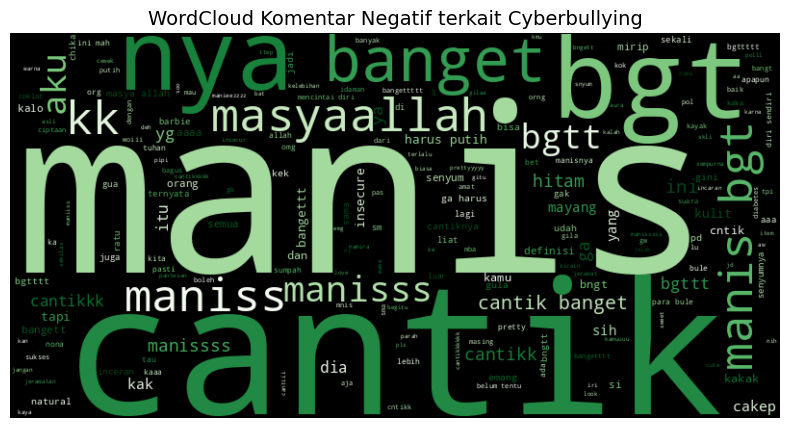

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter hanya komentar dengan label negatif
negatif_text = " ".join(data[data['label'] == 'POSITIVE']['coment'])

# Buat WordCloud untuk komentar negatif
wordcloud_negatif = WordCloud(width=800, height=400, background_color='black', colormap='Greens').generate(negatif_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')  # Hilangkan sumbu
plt.title("WordCloud Komentar Negatif terkait Cyberbullying", fontsize=14)
plt.show()
